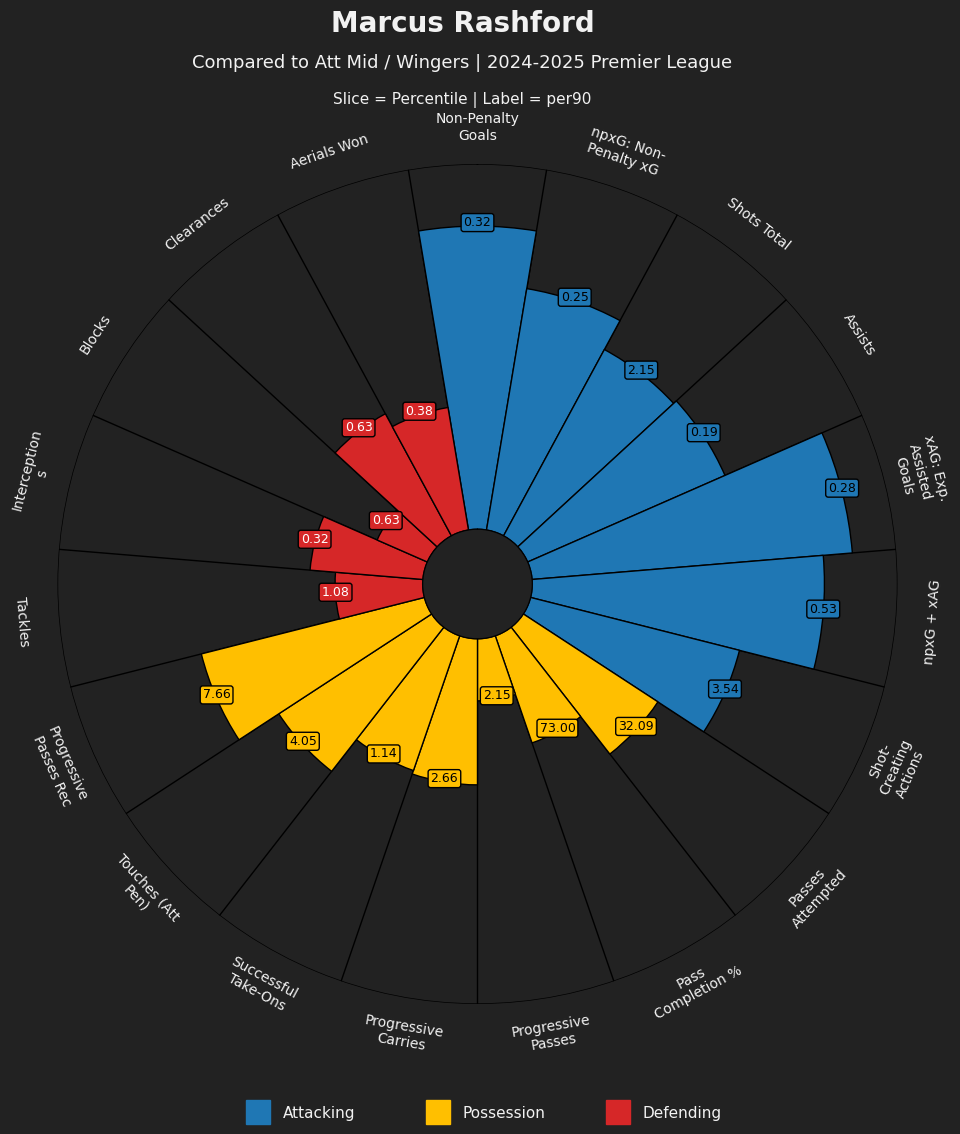

,Metric,per90,Percentile
0,Non-Penalty Goals,0.32,83.0
1,npxG: Non-Penalty xG,0.25,67.0
2,Shots Total,2.15,58.0
3,Assists,0.19,59.0
4,xAG: Exp. Assisted Goals,0.28,88.0
5,npxG + xAG,0.53,80.0
6,Shot-Creating Actions,3.54,59.0
7,Passes Attempted,32.09,44.0
8,Pass Completion %,73.00,31.0
9,Progressive Passes,2.15,17.0


In [1]:
import pandas as pd
from mplsoccer import PyPizza
import matplotlib.pyplot as plt
import textwrap

# === 1. Tentukan urutan & kategori ===
attacking_params = [
    "Non-Penalty Goals",
    "npxG: Non-Penalty xG",
    "Shots Total",
    "Assists",
    "xAG: Exp. Assisted Goals",
    "npxG + xAG",
    "Shot-Creating Actions"
]

possession_params = [
    "Passes Attempted",
    "Pass Completion %",
    "Progressive Passes",
    "Progressive Carries",
    "Successful Take-Ons",
    "Touches (Att Pen)",
    "Progressive Passes Rec"
]

defending_params = [
    "Tackles",
    "Interceptions",
    "Blocks",
    "Clearances",
    "Aerials Won"
]

params = attacking_params + possession_params + defending_params

# === 2. Fungsi wrap supaya tidak kepotong ===
def wrap_param_names(params_list, width=12):
    return ['\n'.join(textwrap.wrap(p, width=width)) for p in params_list]

params_wrapped = wrap_param_names(params)

# === 3. Fungsi plot pizza ===
def plot_pizza_chart(csv_path):
    df = pd.read_csv(csv_path)
    player_name = df.loc[0, "player"]

    values_pct = [df.loc[0, f"{p}_pct"] for p in params]
    values_p90 = [df.loc[0, f"{p}_p90"] for p in params]

    # === Warna slice ===
    attacking_color = "#1f77b4"   # biru
    possession_color = "#ffbf00"  # kuning/oranye
    defending_color = "#d62728"   # merah

    slice_colors = (
        [attacking_color] * len(attacking_params) +
        [possession_color] * len(possession_params) +
        [defending_color] * len(defending_params)
    )

    # === Buat pizza chart ===
    baker = PyPizza(
        params=params_wrapped,
        background_color="#222222",
        straight_line_color="#000000",
        straight_line_lw=1,
        last_circle_color="#000000",
        last_circle_lw=1,
        other_circle_lw=0,
        inner_circle_size=15
    )

    fig, ax = baker.make_pizza(
        values_pct,
        figsize=(12, 12),
        param_location=110,
        slice_colors=slice_colors,
        kwargs_slices=dict(edgecolor="#000000", zorder=2, linewidth=1),
        kwargs_params=dict(color="#F2F2F2", fontsize=10, va="center"),
        kwargs_values=dict(  # default aja nanti kita ganti manual
            color="#F2F2F2", fontsize=9, zorder=3,
            bbox=dict(edgecolor="#000000", facecolor="white",
                      boxstyle="round,pad=0.2", lw=1)
        )
    )

    # === Ubah angka per90 & warnanya sesuai slice ===
    for i, text_obj in enumerate(baker.value_texts):
        # set nilai per90
        text_obj.set_text(f"{values_p90[i]:.2f}")

        # cek kategori slice
        slice_color = slice_colors[i]
        if slice_color == attacking_color:
            # biru → kotaknya biru, text hitam
            text_obj.set_bbox(dict(edgecolor="#000000", facecolor=attacking_color,
                                   boxstyle="round,pad=0.2", lw=1))
            text_obj.set_color("black")

        elif slice_color == possession_color:
            # kuning → kotaknya kuning, text hitam
            text_obj.set_bbox(dict(edgecolor="#000000", facecolor=possession_color,
                                   boxstyle="round,pad=0.2", lw=1))
            text_obj.set_color("black")

        else:
            # merah → kotaknya merah, text putih
            text_obj.set_bbox(dict(edgecolor="#000000", facecolor=defending_color,
                                   boxstyle="round,pad=0.2", lw=1))
            text_obj.set_color("white")

    # === Geser chart supaya ada ruang title & legend ===
    plt.subplots_adjust(top=0.85, bottom=0.15)

    # === Title utama ===
    fig.text(
        0.5, 0.96, f"{player_name}",
        size=20, ha="center", color="#F2F2F2", weight="bold"
    )
    # Subtitle
    fig.text(
        0.5, 0.93,
        "Compared to Att Mid / Wingers | 2024-2025 Premier League",
        size=13, ha="center", color="#F2F2F2"
    )
    # Info tambahan
    fig.text(
        0.5, 0.90,
        "Slice = Percentile | Label = per90",
        size=11, ha="center", color="#F2F2F2"
    )

    # === Legend kategori di bawah chart ===
    legend_y = 0.05
    fig.patches.extend([
        plt.Rectangle((0.32, legend_y), 0.02, 0.02, fill=True, color=attacking_color,
                      transform=fig.transFigure, figure=fig),
        plt.Rectangle((0.47, legend_y), 0.02, 0.02, fill=True, color=possession_color,
                      transform=fig.transFigure, figure=fig),
        plt.Rectangle((0.62, legend_y), 0.02, 0.02, fill=True, color=defending_color,
                      transform=fig.transFigure, figure=fig),
    ])
    fig.text(0.35, legend_y + 0.005, "Attacking", ha="left", color="#F2F2F2", size=11)
    fig.text(0.50, legend_y + 0.005, "Possession", ha="left", color="#F2F2F2", size=11)
    fig.text(0.65, legend_y + 0.005, "Defending", ha="left", color="#F2F2F2", size=11)

    plt.show()

    # === Tabel numerik bawah ===
    display_table = pd.DataFrame({
        "Metric": params,
        "per90": values_p90,
        "Percentile": values_pct
    })
    return display_table


# === 4. Panggil ===
csv_path = "../data/processed/fbref/marcus_rashford_processed.csv"
table = plot_pizza_chart(csv_path)

table


